# Kwic - Keywords in Context

Im ersten Schritt werden die Originaltexte eingelesen

In [51]:
import pandas as pd

df = pd.read_csv('C:/Users/jonas/Documents/Uni_Wuerzburg/Digital_Humanities/Projekt/Fanfiction/df_original.csv', encoding='utf-8')


In [ ]:
df.head()

Im zweiten Schritt werden die Texte zum Analysieren vorbereitet

In [ ]:
a. Remove none alphabetic characters

1. Pattern - The above pattern says any character other than A-Z and a-z.
2. Replacement - Any character matched with the above pattern will be replaced by the value in second parameter.
3. Content

b. Make the word lower case

c. Remove the stop words

Die Stopword Liste von NLTK wird durch weitere Wörter ergänzt

Bevor alle Stopwords entfernt werden, muss der Text tokenisiert werden

In [5]:
def get_tokens(my_original_files):
    from nltk.tokenize import word_tokenize 
    wordsFiltered = []
    for i in my_original_files:
    
        
        tokens = word_tokenize(i) 
        for w in tokens:
            if w.isalpha():
            
                wordsFiltered.append(w)
                
    return wordsFiltered
        
    
    

In [6]:
my_original_files = list(df.clean_text.values)

In [7]:
wordsFiltered = get_tokens(my_original_files)
len(wordsFiltered)

652252

In [8]:
from nltk.text import Text
textList = Text(wordsFiltered)
textList.concordance('harry')

Displaying 25 of 17249 matches:
rmines geheimnis eulenpost eulenpost harry potter vielerlei hinsicht höchst ung
prechenden absatzes hielt feder inne harry schob brille runden gläsern nase hoc
verkleidungen fangen verbrennen ließ harry steckte feder zähne kramte kopfkisse
igusterweg nummer vier grund weshalb harry sommerferien nie genießen konnte onk
g tante petunia onkel vernon gehofft harry immer knute hielten zauberei schließ
iger angst davor jemand herausfinden harry seit zwei jahren hogwarts ging schul
chließen verbieten nachbarn sprechen harry zauberbücher herankam erhebliches pr
chrumpftränke professor snape lehrer harry wenigsten leiden konnte grund freuen
ten leiden konnte grund freuen würde harry monat nachsitzen aufzubrummen deshal
onat nachsitzen aufzubrummen deshalb harry ersten ferienwoche gelegenheit beim 
nnten ebenfalls notiz nehmen schlich harry unten knackte schloss treppenschrank
hren nachts zauberei büffelte gerade harry ärger onkel tante preis vermeiden oh
rerfamil

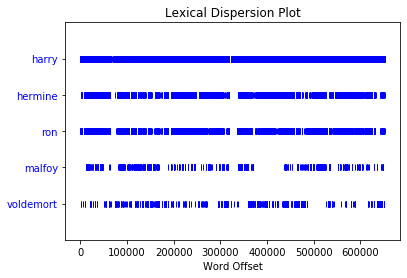

In [10]:
textList.dispersion_plot(["harry", "hermine", "ron", "malfoy", "voldemort"])

Kwic-Erstellen

In [49]:
def makeConc(word2conc,list2FindIn,context2Use,concList):
    # Lets get 
    end = len(list2FindIn)
    for location in range(end):
        if list2FindIn[location] == word2conc:
            # Here we check whether we are at the very beginning or end
            if (location - context2Use) < 0:
                beginCon = 0
            else:
                beginCon = location - context2Use
                
            if (location + context2Use) > end:
                endCon = end
            else:
                endCon = location + context2Use + 1
                
            theContext = (list2FindIn[beginCon:endCon])
            #theContexte = ','.join(theContext)
            concordanceLine = '; '.join(theContext)
            # print(str(location) + ": " + concordanceLine)
            concList.append(str(location) + "; " + concordanceLine)

In [27]:
names = ["harry", "harrys", "ron", "rons", "weasley", "weasleys", "hermine", "hermines", "snape", "snapes", "dumbledore", "dumbledores", "voldemort", "voldemorts","malfoy", "malfoys", "draco", "dracos"]

In [50]:
names2 = ["ronald", "ronalds", " tom riddle", " tom riddles", "hermine granger", "hermine grangers", 'harry potter', ' harry potters', 'dessen name nicht genannt werden darf']

In [25]:
theConc = []
for i in names2:
    name = makeConc(i,wordsFiltered,int(5),theConc)
    theConc.append(name)
theConc[-5:]

['493596; mittels; flohpulver; fuchsbau; zurückreisten; verabschiedeten; grangers; pub; richtung; muggelstraße; verließen; mr',
 '540252; narbe; berichtete; schon; hallte; hermine; grangers; stimme; kopf; wider; schrill; voller',
 '584587; harry; fast; ständig; begleitung; hermine; grangers; sehen; ist; umwerfend; hübschen; muggelstämmigen',
 '614801; gar; zweifelhaften; natürlichen; reize; miss; grangers; denen; beiden; unglücklichen; jungen; verfallen',
 None]

In [26]:
dfObj = pd.DataFrame(theConc) 

In [27]:
len(dfObj)

523

In [28]:
df_all_keys = pd.DataFrame(dfObj[0].str.split(';', expand=True).values)

In [29]:
df_all_keys

0           1                  2             3                4   \
0     47442   kletterte       wendeltreppe      hinunter         lavender   
1     77759     dennoch                ich     zugunsten          freunde   
2    111080        jahr   zusammengestellt           hat            viele   
3    115897     bislang         ungeahnten     magischen      fähigkeiten   
4    136681       snape                ich         hätte   feinsinnigeres   
..      ...         ...                ...           ...              ...   
518  493596     mittels         flohpulver      fuchsbau    zurückreisten   
519  540252       narbe         berichtete         schon           hallte   
520  584587       harry               fast       ständig       begleitung   
521  614801         gar      zweifelhaften   natürlichen            reize   
522    None        None               None          None             None   

                   5          6         7            8                9   \
0             wartete     ronald   weasley        sagte        vertraute   
1                  mr     ronald   weasley         miss          hermine   
2             dachten     ronald   weasley   anbetracht   durchwachsenen   
3                sind     ronald     sagte       george              was   
4            erwartet     ronald   weasley       jungen             fest   
..                ...        ...       ...          ...              ...   
518   verabschiedeten   grangers       pub     richtung     muggelstraße   
519           hermine   grangers    stimme         kopf            wider   
520           hermine   grangers     sehen          ist        umwerfend   
521              miss   grangers     denen       beiden    unglücklichen   
522              None       None      None         None             None   

             10                11  
0      rauchige            stimme  
1       granger           lockern  
2      leistung             hüter  
3         hören             ginny  
4           ist              paar  
..          ...               ...  
518   verließen                mr  
519     schrill            voller  
520    hübschen   muggelstämmigen  
521      jungen         verfallen  
522        None              None  

[523 rows x 12 columns]

In [30]:
df_all_keys["index"] = df_all_keys[6]

In [31]:
df_all_keys.set_index("index", inplace = True)

In [32]:
df_all_keys = df_all_keys.rename(columns={6: "key_word"})

In [33]:
df_all_keys

0           1                  2             3  \
index                                                            
 ronald     47442   kletterte       wendeltreppe      hinunter   
 ronald     77759     dennoch                ich     zugunsten   
 ronald    111080        jahr   zusammengestellt           hat   
 ronald    115897     bislang         ungeahnten     magischen   
 ronald    136681       snape                ich         hätte   
...           ...         ...                ...           ...   
 grangers  493596     mittels         flohpulver      fuchsbau   
 grangers  540252       narbe         berichtete         schon   
 grangers  584587       harry               fast       ständig   
 grangers  614801         gar      zweifelhaften   natürlichen   
NaN          None        None               None          None   

                         4                 5   key_word         7  \
index                                                               
 ronald           lavender           wartete     ronald   weasley   
 ronald            freunde                mr     ronald   weasley   
 ronald              viele           dachten     ronald   weasley   
 ronald        fähigkeiten              sind     ronald     sagte   
 ronald     feinsinnigeres          erwartet     ronald   weasley   
...                    ...               ...        ...       ...   
 grangers    zurückreisten   verabschiedeten   grangers       pub   
 grangers           hallte           hermine   grangers    stimme   
 grangers       begleitung           hermine   grangers     sehen   
 grangers            reize              miss   grangers     denen   
NaN                   None              None       None      None   

                     8                9          10                11  
index                                                                  
 ronald          sagte        vertraute    rauchige            stimme  
 ronald           miss          hermine     granger           lockern  
 ronald     anbetracht   durchwachsenen    leistung             hüter  
 ronald         george              was       hören             ginny  
 ronald         jungen             fest         ist              paar  
...                ...              ...         ...               ...  
 grangers     richtung     muggelstraße   verließen                mr  
 grangers         kopf            wider     schrill            voller  
 grangers          ist        umwerfend    hübschen   muggelstämmigen  
 grangers       beiden    unglücklichen      jungen         verfallen  
NaN               None             None        None              None  

[523 rows x 12 columns]

POS hinzufügen 

In [171]:
!pip install HanTa

In [10]:
from HanTa import HanoverTagger as ht

tagger = ht.HanoverTagger('morphmodel_ger.pgz')

In [190]:
df_test = df_pos[:20]

In [193]:
df_test

-5  \
index                                                       
 harry   dementors hermines geheimnis eulenpost eulenp...   
 harry   versprechenden absatzes hielt feder inne scho...   
 harry   verschiedenen verkleidungen fangen verbrennen...   
 harry   ligusterweg nummer vier grund weshalb sommerf...   
 harry   tante petunia onkel vernon gehofft immer knut...   
 harry   ständiger angst davor jemand herausfinden sei...   
 harry   sommerferien wegzuschließen verbieten nachbar...   
 harry   kniffliger schrumpftränke professor snape leh...   
 harry   leiden konnte grund freuen würde monat nachsi...   
 harry   harry monat nachsitzen aufzubrummen deshalb e...   
 harry   umhinkonnten ebenfalls notiz nehmen schlich u...   
 harry   erfahren nachts zauberei büffelte gerade ärge...   
 harry   zaubererfamilie hieß mehr zauberei wusste jed...   
 harry   telefon ging vernon dursley apparat zufällig ...   
 harry   hörte hallo hallo hören möchte potter spreche...   
 harry   hinweg unterhalten würden ich schulfreund onk...   
 harry   onkel vernons kleine augen funkelten an immer...   
 harry   immer angewurzelt dastand es gibt potter polt...   
 harry   geben polterte onkel vernon besprühte mächtig...   
 harry   mächtig spucke ron offenbar begriffen schwier...   

                                                    nouns  
index                                                      
 harry                              [Geheimnis, Hinsicht]  
 harry                      [Absatz, Feder, Brille, Nase]  
 harry                          [Feder, Zahn, Kopfkissen]  
 harry  [Ligusterweg, Nummer, Grund, Sommerferien, Onkel]  
 harry             [Tante, Petunia, Onkel, Vernon, Knute]  
 harry                                      [Angst, Jahr]  
 harry  [Sommerferien, Nachbar, Zauberbuch, Problem, L...  
 harry             [Kniffliger, Professor, Lehrer, Grund]  
 harry                      [Leiden, Grund, Monat, Harry]  
 harry   [Harry, Monat, Ferienwoche, Gelegenheit, Schopf]  
 harry                                            [Notiz]  
 harry                              [Onkel, Tante, Preis]  
 harry                         [Zaubererfamilie, Telefon]  
 harry   [Telefon, Vernon, Dursley, Apparat, Zimmer, Ron]  
 harry                      [Hallo, Hallo, Sprechen, Ron]  
 harry                 [Schulfreund, Onkel, Vernon, Auge]  
 harry                              [Onkel, Vernon, Auge]  
 harry                                    [Onkel, Vernon]  
 harry                        [Geben, Onkel, Vernon, Ron]  
 harry                               [Ron, Schwierigkeit]

In [194]:
df_pos['nouns'] = df_pos['-5'].apply(get_nouns)

In [195]:
df_pos

-5  \
index                                                       
 harry   dementors hermines geheimnis eulenpost eulenp...   
 harry   versprechenden absatzes hielt feder inne scho...   
 harry   verschiedenen verkleidungen fangen verbrennen...   
 harry   ligusterweg nummer vier grund weshalb sommerf...   
 harry   tante petunia onkel vernon gehofft immer knut...   
...                                                   ...   
 draco   abgrundtiefer verachtung zu pansy parkinson a...   
 draco   paar bulgarische minister cornelius fudge die...   
 draco   minister cornelius fudge malfoys die rief ron...   
 draco   herr immer bereit drang lucius stimme hastig ...   
 draco   raus hier sagte harry mehr nähe gewesen seit ...   

                                                    nouns  
index                                                      
 harry                              [Geheimnis, Hinsicht]  
 harry                      [Absatz, Feder, Brille, Nase]  
 harry                          [Feder, Zahn, Kopfkissen]  
 harry  [Ligusterweg, Nummer, Grund, Sommerferien, Onkel]  
 harry             [Tante, Petunia, Onkel, Vernon, Knute]  
...                                                   ...  
 draco                      [Verachtung, Parkinson, Mund]  
 draco                         [Minister, Cornelius, Ron]  
 draco          [Minister, Cornelius, Fudge, Ron, Stimme]  
 draco                             [Herr, Lucius, Kapuze]  
 draco                                      [Harry, Nähe]  

[39796 rows x 2 columns]

In [200]:
df_pos['adjectives'] = df_pos['-5'].apply(get_adjectives)

In [207]:
df_pos['verbs'] = df_pos['-5'].apply(get_verbs)

In [2]:
from pprint import pprint

def get_adjectives (string):
    nouns = [] 
    sentences_tok = [nltk.tokenize.word_tokenize(string)]
    for sent in sentences_tok:
        tags = tagger.tag_sent(sent) 
        nouns_from_sent = [lemma for (word,lemma,pos) in tags if pos == "ADJA"]
    return nouns_from_sent


In [3]:
from pprint import pprint

def get_verbs (string):
    nouns = [] 
    sentences_tok = [nltk.tokenize.word_tokenize(string)]
    for sent in sentences_tok:
        tags = tagger.tag_sent(sent) 
        nouns_from_sent = [lemma for (word,lemma,pos) in tags if pos == "VAFIN" or pos == "VVPP" or pos =="VVFIN"]
    return nouns_from_sent


In [4]:
from pprint import pprint

def get_nouns (string):
    nouns = [] 
    sentences_tok = [nltk.tokenize.word_tokenize(string)]
    for sent in sentences_tok:
        tags = tagger.tag_sent(sent) 
        nouns_from_sent = [lemma for (word,lemma,pos) in tags if pos == "NN" or pos == "NE"]
    return nouns_from_sent

#fdist = nltk.FreqDist(nouns)    

#pprint(fdist.most_common(10))
#fdist.plot(50,cumulative=False)

In [208]:
df_pos

-5  \
index                                                       
 harry   dementors hermines geheimnis eulenpost eulenp...   
 harry   versprechenden absatzes hielt feder inne scho...   
 harry   verschiedenen verkleidungen fangen verbrennen...   
 harry   ligusterweg nummer vier grund weshalb sommerf...   
 harry   tante petunia onkel vernon gehofft immer knut...   
...                                                   ...   
 draco   abgrundtiefer verachtung zu pansy parkinson a...   
 draco   paar bulgarische minister cornelius fudge die...   
 draco   minister cornelius fudge malfoys die rief ron...   
 draco   herr immer bereit drang lucius stimme hastig ...   
 draco   raus hier sagte harry mehr nähe gewesen seit ...   

                                                    nouns  \
index                                                       
 harry                              [Geheimnis, Hinsicht]   
 harry                      [Absatz, Feder, Brille, Nase]   
 harry                          [Feder, Zahn, Kopfkissen]   
 harry  [Ligusterweg, Nummer, Grund, Sommerferien, Onkel]   
 harry             [Tante, Petunia, Onkel, Vernon, Knute]   
...                                                   ...   
 draco                      [Verachtung, Parkinson, Mund]   
 draco                         [Minister, Cornelius, Ron]   
 draco          [Minister, Cornelius, Fudge, Ron, Stimme]   
 draco                             [Herr, Lucius, Kapuze]   
 draco                                      [Harry, Nähe]   

                           adjectives                       verbs  
index                                                              
 harry                 [ungewöhnlich]                          []  
 harry  [versprechend, rund, gläsern]          [halten, schieben]  
 harry                  [verschieden]   [lassen, stecken, kramen]  
 harry                             []                          []  
 harry                             []            [hoffen, halten]  
...                               ...                         ...  
 draco           [abgrundtief, offen]                    [laufen]  
 draco                   [bulgarisch]             [fudgen, rufen]  
 draco                             []                     [rufen]  
 draco                             []   [dringen, stimmen, haben]  
 draco                             []  [sagen, beobachten, haben]  

[39796 rows x 4 columns]

In [34]:
df_all_keys.to_csv("Kwic/kwic_original_2.csv")

In [161]:
df = pd.read_csv("Kwic/kwic_original.csv")

In [162]:
df.set_index("index", inplace = True)

In [163]:
df.columns

Index(['location', '-5', '-4', '-3', '-2', '-1', 'key_word', '1', '2', '3',
       '4', '5'],
      dtype='object')

In [164]:
df_pos = df['-5'].str.cat(df[['-4','-3','-2','-1','1','2','3','4','5']], sep ="") 

In [165]:
df_pos = df_pos.to_frame()

In [179]:
#df_pos = df_pos.to_frame()
df_pos= df_pos[df_pos['-5'].notnull()]

Im dritten Schritt wird von den Texten zu jedem Namen der Kontext in ein Dataframe gespeichert

In [15]:
# nGramme werden festgelegt
ngrams = [wordsFiltered[i:i+10] for i in range(len(wordsFiltered)-4)]
# ein Dictionary für alle Wörter wird erstellt
kwicdict = {}
for n in ngrams:
    if n[4] not in kwicdict:
        kwicdict[n[4]] = [n]
    else:
        kwicdict[n[4]].append(n)


In [18]:
# im Dict nach den Namen suchen
# Kontext -5 und +5 werden ausgegeben
# wird in Serie gespeichert
# Index = Name
def get_kwic_of_names(list_of_names, kwicdict):
    import pandas as pd
    import re
    with open(list_of_names, "r") as fi:
            series = pd.Series(dtype=str)
            list_of_texts = []
            counter = 0
            pivot = fi.read().split()
            for keywords in pivot: 
                for key in kwicdict.copy():
                    if 'ronan' in kwicdict:
                        del kwicdict['ronan']

                    else:
                        if re.match(keywords, key):
                        
                            for val in kwicdict[key]:
                                outstring = ' '.join(val[:4]).rjust(55)
                                outstring += ''
                                #outstring += ''.join(str(val[4]).center(len(n[4])+2))
                                outstring +=' '
                                outstring += ' '.join(val[5:])
                                print(outstring)
                                x = pd.Series(outstring, index = [keywords])
                                series= series.append(x)
                                series = series.groupby(level = 0).apply(lambda x: " ".join(x.astype(str)))
                       
                            #keys = ['harry', 'ron', 'hermine', 'voldemort', 'malfoy', 'bill', 'ginny', 'hagrid', 'dumbledore', 'snape', 'neville', 'mcgonagall', 'fred', 'george']
                            
                                counter += 1 
                                #list_of_texts.append(outstring)
                            
    return series
        

In [19]:
#Funktion aufrufen
series = get_kwic_of_names('Harry_names.txt', kwicdict)

In [20]:
series

bill                                   ägypten ausgeben älte...
dumbledore                              richtig hältst vergi...
fred                               essen ständig aufleuchtet...
george                              ständig aufleuchtete bem...
ginny                                   krätze schulter arm ...
hagrid                                  braunen papier sofor...
harry                            englischen klaus fritz orig...
hermine                              voldemorts knecht kuss ...
malfoy                                    leiden erschienen ...
mcgonagall                            freundlichen grüßen pr...
neville                                           heißt n bo...
ron                              anruf befreundeten zauberer...
snape                        feuerblitz patronus gryffindor ...
voldemort                                      hund vier fre...
dtype: object

In [21]:
#Serie wird als Dataframe gespeichert, damit die Weiterverarbeitung leichter erfolgen kann
import pandas as pd
df = pd.DataFrame({'Kontext': series})

In [22]:
df.to_csv("concordance_original.csv")

In diesem Schritt werden aus dem Text die Namen entfernt, damit bei den most_common_words nicht nur Namen auftauchen

In [23]:
import pandas as pd
df = pd.read_csv("concordance_original.csv")

In [25]:
df = df.set_index('Unnamed: 0')

In [ ]:
pipeline = [lambda s: re.sub('[^\w\s]', '', s),
            lambda s: re.sub('[\d]', '', s),
            lambda s: s.lower(),
            lambda s: ' '.join(map(stem, shorttext.utils.tokenize(s)))
 ]
txtpreproceesor = shorttext.utils.text_preprocessor(pipeline)


In [68]:
import re
import nltk
        
pat1 = '(harry.)'
pat2= '(ron.)'
pat3 = '(hermine.)'
pat4 = '(dumbledore.)'
pat5 = '(snape.)'
pat6 = '(hagrid.)'
pat7 = '(ginny.)'
pat8 = '(bill.)'
pat9 = '(malfoy.)'
pat10 = '(voldemort.)'
pat11 = '(neville.)'
pat12 = '(mcgonagall.)'
pat13 = '(fred.)'
pat14 = '(george.)'
pat15 = '(weasley.)'
pat16 = '(sirius.)'
pat17 = '(albus.)'
combined_pat = '|'.join((pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9, pat10, pat11, pat12, pat13, pat14, pat15, pat16, pat17))
#Namen werden entfernt
df['Kontext2'] = df['Kontext'].str.replace(combined_pat, ' ', regex = True)
#Text wird tokensisiert
df['tokenized_texts'] = df.apply(lambda row: nltk.word_tokenize(row['Kontext2']), axis=1)

In [69]:
combined_pat

'(harry.)|(ron.)|(hermine.)|(dumbledore.)|(snape.)|(hagrid.)|(ginny.)|(bill.)|(malfoy.)|(voldemort.)|(neville.)|(mcgonagall.)|(fred.)|(george.)|(weasley.)|(sirius.)|(albus.)'

In [70]:
df

Kontext  \
bill                                 ägypten ausgeben älte...   
dumbledore                            richtig hältst vergi...   
fred                             essen ständig aufleuchtet...   
george                            ständig aufleuchtete bem...   
ginny                                 krätze schulter arm ...   
hagrid                                braunen papier sofor...   
harry                          englischen klaus fritz orig...   
hermine                            voldemorts knecht kuss ...   
malfoy                                  leiden erschienen ...   
mcgonagall                          freundlichen grüßen pr...   
neville                                         heißt n bo...   
ron                            anruf befreundeten zauberer...   
snape                      feuerblitz patronus gryffindor ...   
voldemort                                    hund vier fre...   

                                                     Kontext2  \
bill                                 ägypten ausgeben älte...   
dumbledore                            richtig hältst vergi...   
fred                             essen ständig aufleuchtet...   
george                            ständig aufleuchtete bem...   
ginny                                 krätze schulter arm ...   
hagrid                                braunen papier sofor...   
harry                          englischen klaus fritz orig...   
hermine                              knecht kuss dementors...   
malfoy                                  leiden erschienen ...   
mcgonagall                          freundlichen grüßen pr...   
neville                                         heißt n bo...   
ron                            anruf befreundeten zauberer...   
snape                      feuerblitz pat s gryffindor rav...   
voldemort                                    hund vier fre...   

                                              tokenized_texts  
bill        [ägypten, ausgeben, ältester, sohn, fluchbrech...  
dumbledore  [richtig, hältst, vergisst, sicher, hogwarts, ...  
fred        [essen, ständig, aufleuchtete, bemerkt, käfer,...  
george      [ständig, aufleuchtete, bemerkt, käfer, suppe,...  
ginny       [krätze, schulter, arm, schwester, gelegt, fie...  
hagrid      [braunen, papier, sofort, stammte, wildhüter, ...  
harry       [englischen, klaus, fritz, originaltitel, pott...  
hermine     [knecht, kuss, dementors, geheimnis, eulenpost...  
malfoy      [leiden, erschienen, tür, draco, flankiert, ku...  
mcgonagall  [freundlichen, grüßen, professor, m, stellvert...  
neville     [heißt, n, bohrte, stan, longbottom, erstbeste...  
ron         [anruf, befreundeten, zauberer, bekommen, best...  
snape       [feuerblitz, pat, s, gryffindor, ravenclaw, gr...  
voldemort   [hund, vier, freunde, lord, knecht, kuss, deme...

Die 25 häufigsten Begriffe je Name

In [71]:
tokens = df.Kontext2
tokens.values

array(['                         ägypten ausgeben ältester sohn fluchbrecher gringotts zaubererbank arbeitet familie                              hörer brüllen toll ägypten gräber gezeigt glaubst flüchen alten                          nähe trauen aufleuchten drehen plunder zauberertouristen verkaufen könne verlassen                                    wolle wissen eule ägypten koste  ruhe umsehen                     haarmähne  gesicht peitschte isch eiraten  tonlos übersehen                           ähm gratuliere stürzte küsste moment beschäftigt arbeitet art isch                   füreinander geschaffen warten  fleur wirklich gemeinsam fleißiger bodenständiger                                    typ kuh  nickte bodenständig fluchbrecher stimmt s mag                           tonks abendessen glaube hofft stattdessen tonks verliebt hoffe lieber                      mach sorgen beschwichtigte  at amusant  schorsch fleur                      erschienen wären manchmal brachten  neuigkeite

In [72]:
#25 häufigsten Begriffe pro Name
def get_frequency_of_words_names(n, tokens):
    from nltk.probability import FreqDist
    import matplotlib.pyplot as plt
    from nltk.tokenize import sent_tokenize, word_tokenize

    counter = 0
    token = tokens.T.squeeze()
    for index, value in token.items(): 
        token = word_tokenize(value)
    
        fdist1 = FreqDist(token)
    
        fig = plt.figure(figsize=(5, 5))
        fig.suptitle(index, fontsize=12)
        
        fdist1.plot(n)
        
        counter += 1
        
           
        
        
        
        
        
    
        
    
    

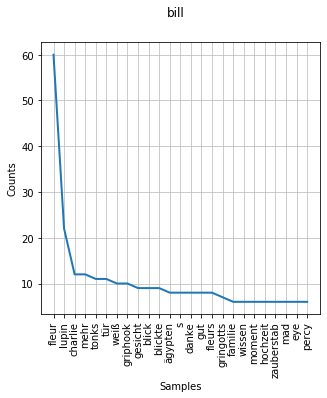

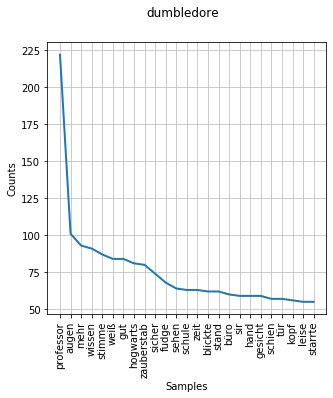

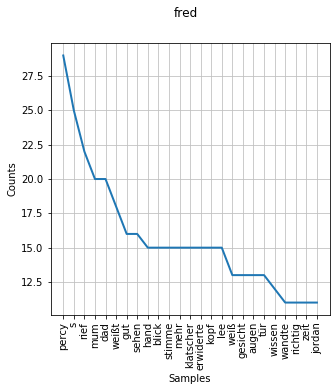

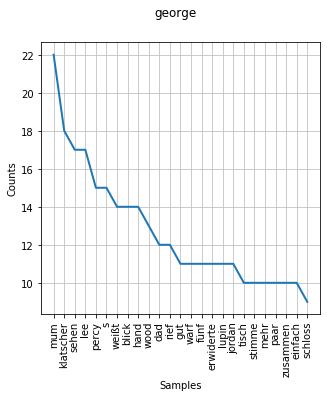

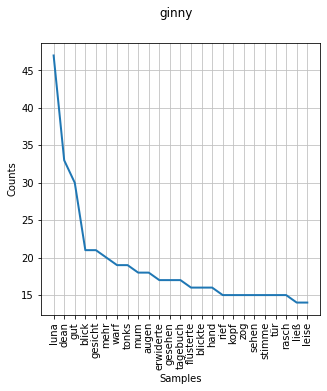

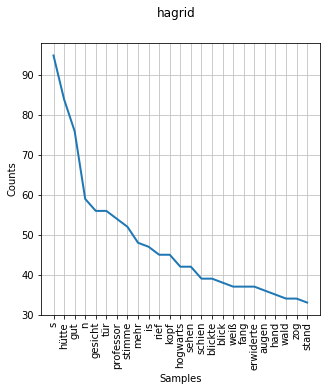

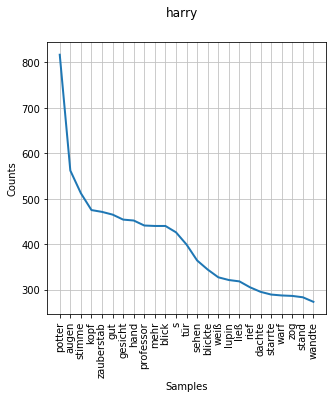

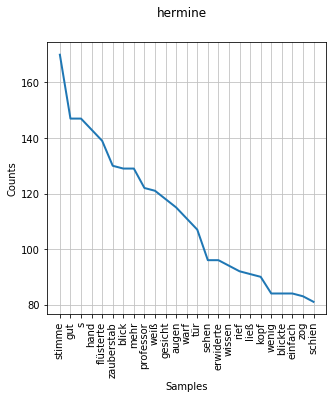

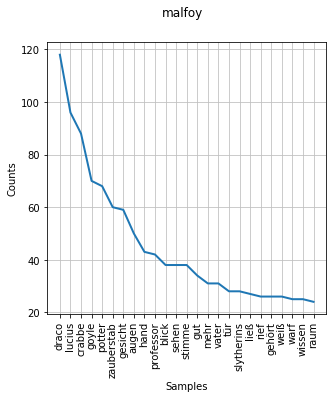

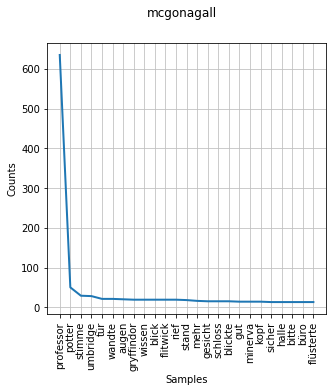

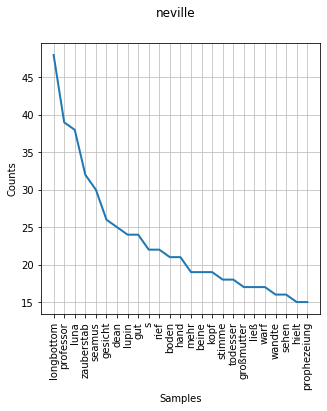

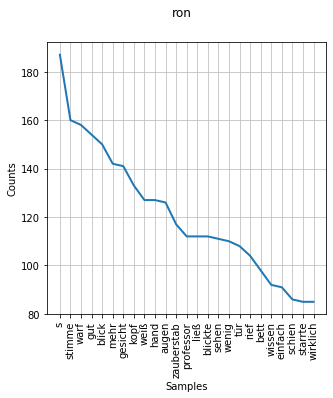

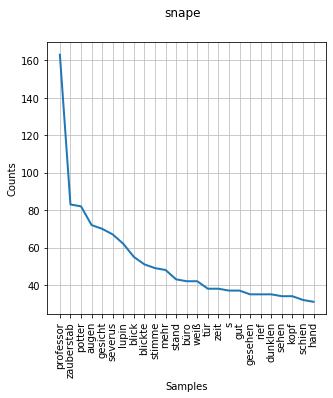

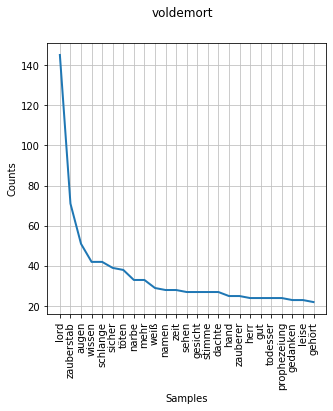

In [73]:
get_frequency_of_words_names(25, tokens)

25 häufigsten Begriffe von allen Texten insgesamt

In [74]:
list_of_names = df['Kontext2'].values.tolist()

In [97]:
def get_frequency_of_words_all(n, list_of_text):
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.probability import FreqDist
    import matplotlib.pyplot as plt
    counter = 0
    wordFiltered = []
    for l in list_of_text:
        tokens = word_tokenize(l) 
        for w in tokens:
            wordFiltered.append(w)
            counter += 1
            
    fdist1 = FreqDist(wordFiltered) 
    
    sample = fdist1.most_common(n)
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('25 häufigsten Wörter', fontsize=12)
    fdist1.plot(n)
    
    fig.savefig('hp_fanfiction_freq_words.png', bbox_inches = "tight")

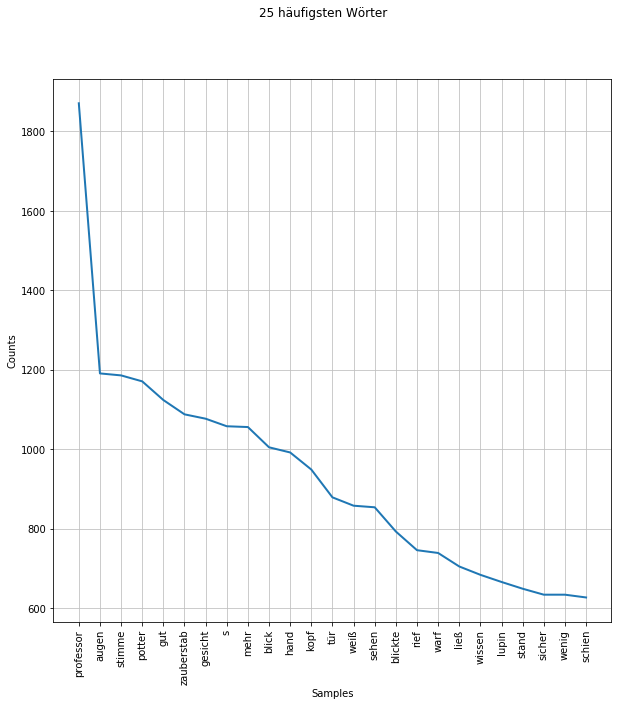

In [96]:
get_frequency_of_words_all(25, list_of_names)

# Vergleich mit Fanfiction

In [40]:
# Einlesen von Fanfictiontexten
import pandas as pd
df2 = pd.read_csv('C:/Users/jonas/Documents/Uni_Wuerzburg/Digital_Humanities/Projekt/Fanfiction/Df_one.csv', encoding='utf-8')

Texte im nächsten Schritt vorbereiten

In [41]:
fanfic_files = df2['clean_text'].values.tolist()

In [42]:
wordsFiltered2 = get_tokens(fanfic_files)   

In [43]:
len(wordsFiltered2)

146840625

In [86]:
import random
wordsFiltered2 = random.sample(wordsFiltered2, 500000)

In [87]:
from nltk.text import Text
textList = Text(wordsFiltered2)
textList.concordance('harry')

Displaying 25 of 4989 matches:
starrte rest begleitest harry du ausbildung frühere verstand nachf
ausgefunden versetzte drein heiraten harry haus abschaum wiederstehen aussagen 
tellen je minky methode thema händen harry spärlich ja ließ hosentasche anderwe
chulen komischen danke fenster zu du harry fährte draco horror stand zurückkehr
 augen schulter narzissa ministerium harry brennt hand nahm draconein schluss s
 zeigte narzissa kopf konntesie hoch harry legte fuhr oben gemeinsames um außer
 hocke draußen dragon seit gemeinsam harry beste mochte liegenden getanich seuf
ls sir schon aussehender erlebnissen harry vater sah drückte angenehme sahsen f
fensichtlich nickte entschied steige harry ach tat naja rückenund severus macht
deutig wissen entscheidung eben ging harry durchs harrys miss sobald sprach par
n grinste stühle schließlich träumte harry klar begann gibt moment drein vater 
ditch schallendes irgendwas was hass harry zeit kann lucius reden angst eingefa
 narcissa gehen tut ho

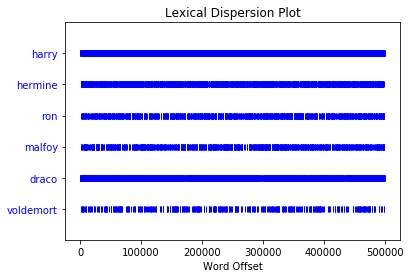

In [89]:
textList.dispersion_plot(["harry", "hermine", "ron", "malfoy", "draco" ,"voldemort"])

In [45]:
theConc = []
for i in names2:
    name = makeConc(i,wordsFiltered2,int(5),theConc)
    theConc.append(name)
theConc[-5:]

['143250663; zuschrieb; liefen; dritt; eltern; denen; potters; standen; es; fehlte; al; mr',
 '143250892; konnte; herzhaftes; lachen; verkneifen; aufmerksamkeit; potters; weasleys; gehörte; daraufhin; moment; lang',
 '144337709; spielt; etwa; siebzig; jahre; harry; potters; leben; hogwarts; also; aufruf; hephaistos',
 '144385963; geburtstag; sehen; kapitel; vorfreue; harry; potters; geburtstag; kapitel; widmen; trotzdem; jemandem',
 None]

In [13]:
dfObj = pd.DataFrame(theConc) 

In [15]:
len(dfObj)

4389115

In [16]:
df_all_keys = pd.DataFrame(dfObj[0].str.split(';', expand=True).values)

In [17]:
df_all_keys["index"] = df_all_keys[6]

In [18]:
df_all_keys.set_index("index", inplace = True)

In [19]:
df_all_keys = df_all_keys.rename(columns={6: "key_word"})

In [62]:
df_all_keys.head()

0            1            2               3            4  \
index                                                                  
 harry    509         oben        stand            herr        ringe   
 harry   8167      zukunft   zeitreisen          vielen         fics   
 harry   8180        james         bond           kocht   abendessen   
 harry  36812         herr        ringe   interessierte    unbedingt   
 harry  54835   vielleicht        fällt              ja       finden   

                             5 key_word        7          8         9  \
index                                                                   
 harry                darunter    harry   potter       rest   familie   
 harry                   kauft    harry   potter   gardinen     kocht   
 harry               unbedingt    harry   potter     sicher   stories   
 harry                     ich    harry   potter     bücher     lesen   
 harry   unsichtbarkeitsumhang    harry   potter     moment       mal   

                 10             11  
index                               
 harry        schon   gefrühstückt  
 harry        james           bond  
 harry         gibt          weißt  
 harry   eigentlich        bewusst  
 harry      vampire       werwölfe

In [35]:
df_all_keys = df_all_keys.rename(columns={1: -5, 2: -4, 3:-3, 4:-2, 5:-1,7:1, 8:2, 9:3, 10:4, 11:5, 0:"location"})

In [36]:
df_all_keys

location          -5                 -4            -3  \
index                                                             
 ronald      47442   kletterte       wendeltreppe      hinunter   
 ronald      77759     dennoch                ich     zugunsten   
 ronald     111080        jahr   zusammengestellt           hat   
 ronald     115897     bislang         ungeahnten     magischen   
 ronald     136681       snape                ich         hätte   
...            ...         ...                ...           ...   
 grangers   493596     mittels         flohpulver      fuchsbau   
 grangers   540252       narbe         berichtete         schon   
 grangers   584587       harry               fast       ständig   
 grangers   614801         gar      zweifelhaften   natürlichen   
NaN           None        None               None          None   

                        -2                -1   key_word         1  \
index                                                               
 ronald           lavender           wartete     ronald   weasley   
 ronald            freunde                mr     ronald   weasley   
 ronald              viele           dachten     ronald   weasley   
 ronald        fähigkeiten              sind     ronald     sagte   
 ronald     feinsinnigeres          erwartet     ronald   weasley   
...                    ...               ...        ...       ...   
 grangers    zurückreisten   verabschiedeten   grangers       pub   
 grangers           hallte           hermine   grangers    stimme   
 grangers       begleitung           hermine   grangers     sehen   
 grangers            reize              miss   grangers     denen   
NaN                   None              None       None      None   

                     2                3           4                 5  
index                                                                  
 ronald          sagte        vertraute    rauchige            stimme  
 ronald           miss          hermine     granger           lockern  
 ronald     anbetracht   durchwachsenen    leistung             hüter  
 ronald         george              was       hören             ginny  
 ronald         jungen             fest         ist              paar  
...                ...              ...         ...               ...  
 grangers     richtung     muggelstraße   verließen                mr  
 grangers         kopf            wider     schrill            voller  
 grangers          ist        umwerfend    hübschen   muggelstämmigen  
 grangers       beiden    unglücklichen      jungen         verfallen  
NaN               None             None        None              None  

[523 rows x 12 columns]

In [67]:
split_harry = df_all_keys.loc[ ' harry' , : ]
split_hermine = df_all_keys.loc[ ' hermine' , : ]
split_ron = df_all_keys.loc[ ' ron' , : ]
split_voldemort = df_all_keys.loc[ ' voldemort' , : ]
split_dumbledore = df_all_keys.loc[ ' dumbledore' , : ]
split_snape = df_all_keys.loc[ ' snape' , : ]
split_draco = df_all_keys.loc[ ' draco' , : ]

In [79]:
df_all = pd.read_excel("Kwic/kwic_original.xlsx")

In [81]:
df_all.set_index("index", inplace = True)

In [82]:
df_all

location               -5              -4          -3           -2  \
index                                                                          
 harry        52.0        dementors        hermines   geheimnis    eulenpost   
 harry       124.0   versprechenden        absatzes       hielt        feder   
 harry       186.0    verschiedenen   verkleidungen      fangen   verbrennen   
 harry       227.0      ligusterweg          nummer        vier        grund   
 harry       264.0            tante         petunia       onkel       vernon   
...            ...              ...             ...         ...          ...   
 malfoys  599734.0    abgrundtiefer      verachtung          zu        pansy   
 malfoys  616648.0             paar     bulgarische    minister    cornelius   
 malfoys  616650.0         minister       cornelius       fudge      malfoys   
 malfoys  635926.0             herr           immer      bereit        drang   
 malfoys  647866.0             raus            hier       sagte        harry   

                  -1  key_word              1           2           3  \
index                                                                   
 harry     eulenpost     harry         potter   vielerlei    hinsicht   
 harry          inne     harry          schob      brille      runden   
 harry          ließ     harry        steckte       feder       zähne   
 harry       weshalb     harry   sommerferien         nie    genießen   
 harry       gehofft     harry          immer       knute     hielten   
...              ...       ...            ...         ...         ...   
 malfoys   parkinson   malfoys            arm        lief     offenem   
 malfoys       fudge   malfoys            die     malfoys        rief   
 malfoys         die   malfoys           rief         ron   plötzlich   
 malfoys      lucius   malfoys         stimme      hastig      kapuze   
 malfoys        mehr   malfoys           nähe     gewesen        seit   

                    4                5  
index                                   
 harry         höchst   ungewöhnlicher  
 harry        gläsern             nase  
 harry         kramte       kopfkissen  
 harry         konnte            onkel  
 harry       zauberei      schließlich  
...               ...              ...  
 malfoys         mund           vorbei  
 malfoys          ron        plötzlich  
 malfoys         laut           stimme  
 malfoys       hervor            hätte  
 malfoys   beobachtet            hatte  

[39810 rows x 12 columns]

In [76]:
df_all_keys.to_csv("Kwic/kwic_fanfic.csv")
#split_harry.to_csv("Kwic/kwic_fanfic_harry.csv")
#split_hermine.to_csv("Kwic/kwic_fanfic_hermine.csv")
#split_ron.to_csv("Kwic/kwic_fanfic_ron.csv")
#split_draco.to_csv("Kwic/kwic_fanfic_draco.csv")
#split_snape.to_csv("Kwic/kwic_fanfic_snape.csv")
#split_voldemort.to_csv("Kwic/kwic_fanfic_voldemort.csv")
#split_dumbledore.to_csv("Kwic/kwic_fanfic_dumbledore.csv")

In [37]:
# rename index of kwic Dataframe
df_all_keys.rename(index={' riddles':'voldemort'},inplace=True)
df_all_keys.rename(index={' riddle':'voldemort'},inplace=True)
df_all_keys.rename(index={' ronald':'ron'},inplace=True)
df_all_keys.rename(index={' ronalds':'ron'},inplace=True)
df_all_keys.rename(index={' granger':'hermine'},inplace=True)
df_all_keys.rename(index={' grangers':'hermine'},inplace=True)
#df_all_keys.rename(index={' voldemorts':' voldemort'},inplace=True)
#df_all_keys.rename(index={' dracos':' draco'},inplace=True)
#df_all_keys.rename(index={" malfoys":' draco'},inplace=True)

In [38]:
df_all_keys

location          -5                 -4            -3  \
index                                                           
ron        47442   kletterte       wendeltreppe      hinunter   
ron        77759     dennoch                ich     zugunsten   
ron       111080        jahr   zusammengestellt           hat   
ron       115897     bislang         ungeahnten     magischen   
ron       136681       snape                ich         hätte   
...          ...         ...                ...           ...   
hermine   493596     mittels         flohpulver      fuchsbau   
hermine   540252       narbe         berichtete         schon   
hermine   584587       harry               fast       ständig   
hermine   614801         gar      zweifelhaften   natürlichen   
NaN         None        None               None          None   

                      -2                -1   key_word         1            2  \
index                                                                          
ron             lavender           wartete     ronald   weasley        sagte   
ron              freunde                mr     ronald   weasley         miss   
ron                viele           dachten     ronald   weasley   anbetracht   
ron          fähigkeiten              sind     ronald     sagte       george   
ron       feinsinnigeres          erwartet     ronald   weasley       jungen   
...                  ...               ...        ...       ...          ...   
hermine    zurückreisten   verabschiedeten   grangers       pub     richtung   
hermine           hallte           hermine   grangers    stimme         kopf   
hermine       begleitung           hermine   grangers     sehen          ist   
hermine            reize              miss   grangers     denen       beiden   
NaN                 None              None       None      None         None   

                       3           4                 5  
index                                                   
ron            vertraute    rauchige            stimme  
ron              hermine     granger           lockern  
ron       durchwachsenen    leistung             hüter  
ron                  was       hören             ginny  
ron                 fest         ist              paar  
...                  ...         ...               ...  
hermine     muggelstraße   verließen                mr  
hermine            wider     schrill            voller  
hermine        umwerfend    hübschen   muggelstämmigen  
hermine    unglücklichen      jungen         verfallen  
NaN                 None        None              None  

[523 rows x 12 columns]

In [39]:
df_all_keys.to_csv("Kwic/kwic_original_2.csv")

POS hinzufügen

In [47]:
df = pd.read_csv("Kwic/kwic_fanfic_voldemort.csv")

In [48]:
len(df)

134237

In [49]:
df_pos_one = df['-5'].str.cat(df[['-4','-3','-2','-1','1','2','3','4','5']], sep ="") 

In [50]:
df_pos_one = df_pos_one.to_frame()

In [51]:
#df_pos = df_pos.to_frame()
df_pos_one= df_pos_one[df_pos_one['-5'].notnull()]

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from multiprocessing import cpu_count, Pool
from helpyy import get_nouns, get_verbs, get_adjectives, get_func
#from helpi import get_func

num_partitions = 10 #number of partitions to split dataframe
num_cores = cpu_count() 

def parallelize_dataframe(df, func):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [44]:
df_pos_one = df_pos_one[:20]

In [45]:
df_pos_one

-5
0    bemerkte carlisle seufzend dad lord emmett sc...
1    grinsen höhepunkt films kam harry gegenüber s...
2    freuen lesen würdet in rpg draco danke review...
3    ncit fluch schnauzte erhab etwa gesagt und bl...
4    genannt darf was hast kontakte avada kedavra ...
5    auszusprechen verdammt mal schreien es verdam...
6    potter erinnerst dich bösen typen entgegen ge...
7    potter tun wäre wichser drüben kannst berührt...
8    lange mal sehen weißt eigentlich film wider a...
9    ichnun blieben still moment cedric getötet wu...
10   nicht hölle los kriegen lord idioten jünger a...
11   guten sadistischen seiten extrem gruseliger l...
12   wurden lily james bösen zauberer ermordet sch...
13   mutter gerettet wurde erhielt narbe wurde art...
14   harry wurde versuchten mord horkrux bekam tei...
15   träumen sehen vorhat harry kann auch sprache ...
16   wahren wenigen tagen rumänien aufbrechen vamp...
17   uns lange geschehnisse rund potter interessie...
18   sollten anhören heute scrimgeour erfahren bea...
19   gesehen mehr lange dauern wird gestürzt umkom...

In [46]:
if __name__ == '__main__':
        
        df_pos_one = parallelize_dataframe(df_pos_one, get_func(df_pos_one, get_nouns))

C:\Users\jonas\HarryP\helpyy.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nouns'] = df['-5'].apply(func)


TypeError: 'DataFrame' object is not callable

In [ ]:
df_pos_one

In [52]:
df_pos_one['nouns'] = df_pos_one['-5'].apply(get_nouns)

In [53]:
df_pos_one

-5  \
0        bemerkte carlisle seufzend dad lord emmett sc...   
1        grinsen höhepunkt films kam harry gegenüber s...   
2        freuen lesen würdet in rpg draco danke review...   
3        ncit fluch schnauzte erhab etwa gesagt und bl...   
4        genannt darf was hast kontakte avada kedavra ...   
...                                                   ...   
134232   klasse albus zusammen rückkehr lord verhinder...   
134233   durchaus nennen nachdem welt wiederauferstehu...   
134234   warum slytherin aufgrund lächerlichen gerücht...   
134235   immer einschüchternd vermutlich aufgrund wiss...   
134236   orks spinnen dämonen inferidann traf gefolge ...   

                                                   nouns  
0                                 [Carlisle, Lord, Kopf]  
1                            [Grinsen, Höhepunkt, Harry]  
2                                   [Rpg, Draco, Review]  
3                                     [Ncit, Fluch, Kuh]  
4                      [Kontakt, Avada, Kedavra, Spruch]  
...                                                  ...  
134232                   [Klasse, Rückkehr, Lord, Leben]  
134233                [Welt, Wiederauferstehung, Freund]  
134234                [Gerücht, Sohn, Vorurteil, Eltern]  
134235                                   [Wissen, Kreis]  
134236  [Orks, Dämon, Inferidann, Gefolge, Heer, Magier]  

[134237 rows x 2 columns]

In [54]:
df_pos_one['adjectives'] = df_pos_one['-5'].apply(get_adjectives)

In [55]:
df_pos_one['verbs'] = df_pos_one['-5'].apply(get_verbs)

In [62]:
df = df_pos_one

In [64]:
df.to_excel("Kwic/kwic_fanfic_pos_voldemort.xlsx")

Mit den tokens ein Kwic erstellen

In [84]:
# nGramme werden festgelegt
ngrams = [wordsFiltered[i:i+10] for i in range(len(wordsFiltered)-4)]
# ein Dictionary für alle Wörter wird erstellt
kwicdict = {}
for n in ngrams:
    if n[4] not in kwicdict:
        kwicdict[n[4]] = [n]
    else:
        kwicdict[n[4]].append(n)


In [89]:
#Funktion aufrufen
series2 = get_kwic_of_names('Harry_names.txt', kwicdict)

In [90]:
#Serie wird als Dataframe gespeichert, damit die Weiterverarbeitung leichter erfolgen kann
import pandas as pd
df3 = pd.DataFrame({'Kontext': series2})

In [91]:
import re
import nltk
        
pat1 = '(harry.)'
pat2= '(ron.)'
pat3 = '(hermine.)'
pat4 = '(dumbledore.)'
pat5 = '(snape.)'
pat6 = '(hagrid.)'
pat7 = '(ginny.)'
pat8 = '(bill.)'
pat9 = '(malfoy.)'
pat10 = '(voldemort.)'
pat11 = '(neville.)'
pat12 = '(mcgonagall.)'
pat13 = '(fred.)'
pat14 = '(george.)'
pat15 = '(weasley.)'
pat16 = '(sirius.)'
pat17 = '(albus.)'
combined_pat = '|'.join((pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9, pat10, pat11, pat12, pat13, pat14, pat15, pat16, pat17))
#Namen werden entfernt
df3['Kontext2'] = df3['Kontext'].str.replace(combined_pat, ' ', regex = True)
#Text wird tokensisiert
df3['tokenized_texts'] = df3.apply(lambda row: nltk.word_tokenize(row['Kontext2']), axis=1)

In [92]:
df3

Kontext  \
bill                                       verlust lebens ...   
dumbledore              wenig gemeinschaftsraum aufhalten ...   
fred                           schließen harry dummes hine...   
george                              stimmte allein lassen ...   
ginny                                  lacht harry aussehe...   
hagrid                        besucht harry gemeinschaftsr...   
harry                                      jilly alten fal...   
hermine                                 freunde gefunden h...   
malfoy                           familie lestrange slyther...   
mcgonagall                         streng aussehende hexe ...   
neville                               respekt sogar angst ...   
ron                              aufgehoben freunde gefund...   
snape                                    läuft männer sieh...   
voldemort                            verändert weiß zeitli...   

                                                     Kontext2  \
bill                                       verlust lebens ...   
dumbledore              wenig gemeinschaftsraum aufhalten ...   
fred                           schließen  dummes hineinger...   
george                              stimmte allein lassen ...   
ginny                                  lacht  aussehen  gr...   
hagrid                        besucht  gemeinschaftsraum r...   
harry                                      jilly alten fal...   
hermine                                 freunde gefunden h...   
malfoy                           familie lestrange slyther...   
mcgonagall                         streng aussehende hexe ...   
neville                               respekt sogar angst ...   
ron                              aufgehoben freunde gefund...   
snape                                    läuft männer sieh...   
voldemort                            verändert weiß zeitli...   

                                              tokenized_texts  
bill        [verlust, lebens, percy, charlie, bruder, verl...  
dumbledore  [wenig, gemeinschaftsraum, aufhalten, professo...  
fred        [schließen, dummes, hineingeraten, grinsend, t...  
george      [stimmte, allein, lassen, räusperte, lachend, ...  
ginny       [lacht, aussehen, grinsen, sesseln, gehst, ach...  
hagrid      [besucht, gemeinschaftsraum, redet, begeistert...  
harry       [jilly, alten, faltigen, oma, trifft, altert, ...  
hermine     [freunde, gefunden, heißen, lächelnd, denkt, b...  
malfoy      [familie, lestrange, slytherin, lucius, merlin...  
mcgonagall  [streng, aussehende, hexe, professor, jilly, s...  
neville     [respekt, sogar, angst, perfektes, angsterfüll...  
ron         [aufgehoben, freunde, gefunden, heißen, lächel...  
snape       [läuft, männer, sieht, severus, scheint, wert,...  
voldemort   [verändert, weiß, zeitlich, stimmt, bellatrix,...

In [93]:
df3.to_csv("concordance_fanfiction.csv", index = False)

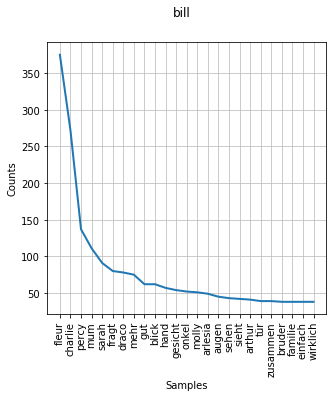

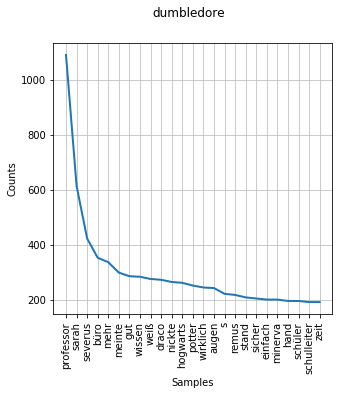

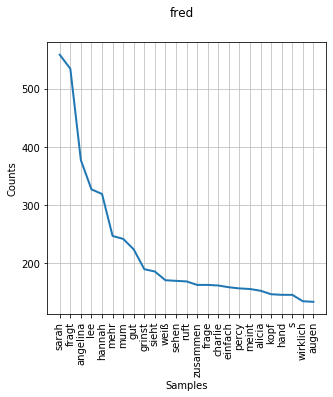

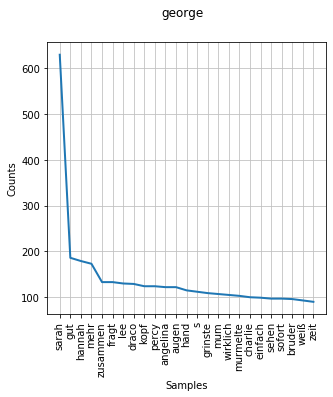

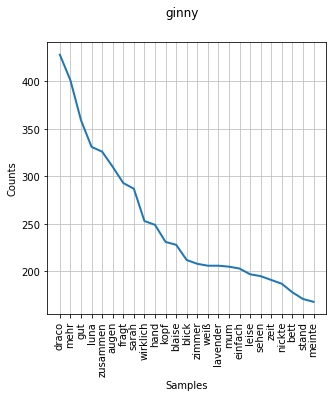

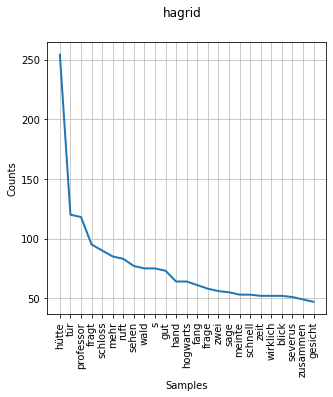

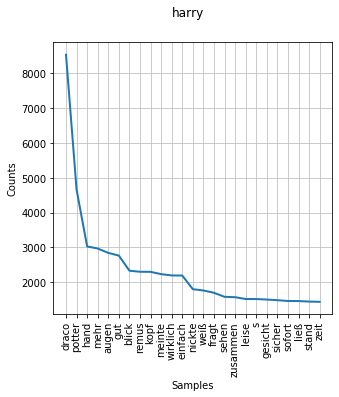

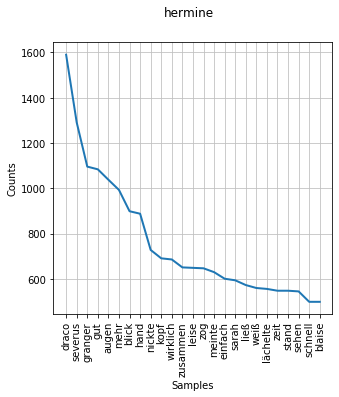

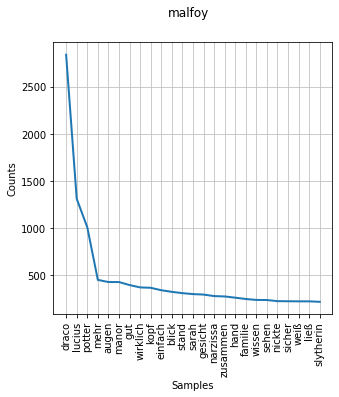

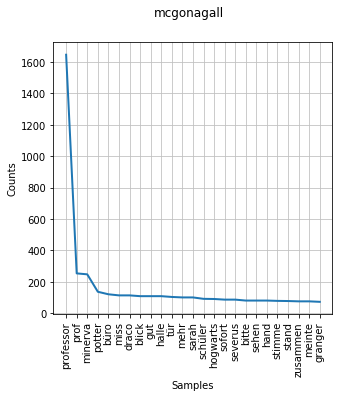

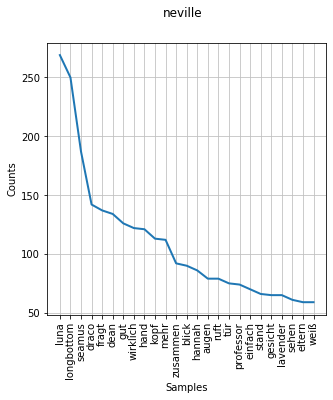

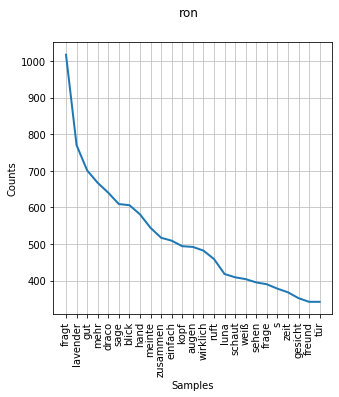

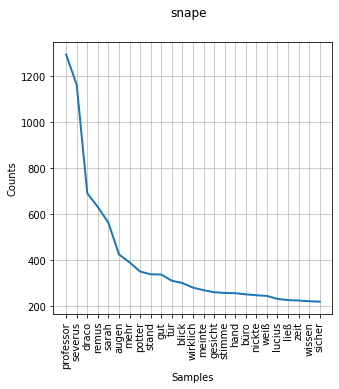

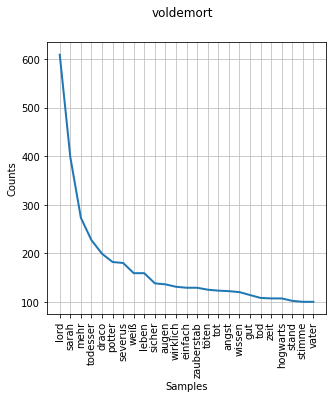

In [99]:
#25 häufigsten Wörter pro Name Fanfic
tokens = df3.Kontext2
get_frequency_of_words_names(25, tokens)

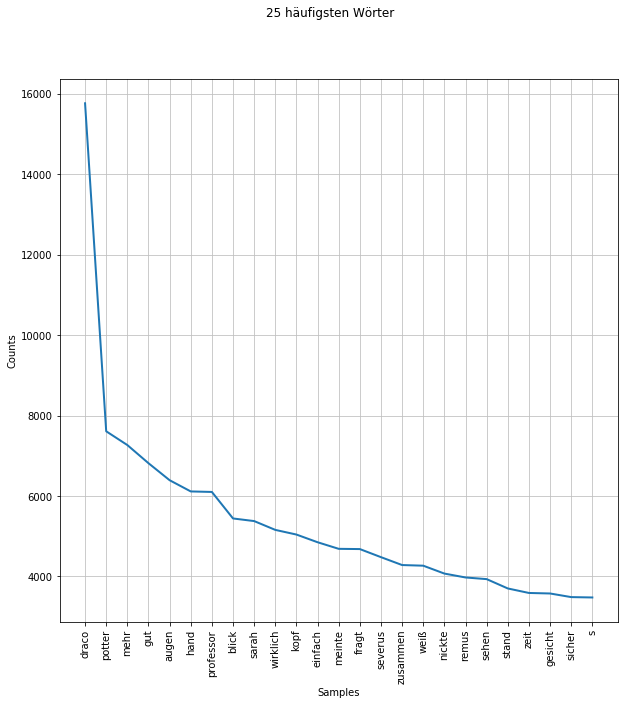

In [98]:
#25 häufigsten Wörter von allen Fanfic Texten
list_of_names = df3['Kontext2'].values.tolist()
get_frequency_of_words_all(25, list_of_names)

In [74]:
# creating the feature matrix 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=2000)
X = matrix.fit_transform(wordFiltered)
X.shape 
dict_harry = matrix.vocabulary_
dict_harry

{'anruf': 46,
 'zauberer': 1919,
 'bekommen': 136,
 'ron': 1304,
 'weasley': 1816,
 'beste': 164,
 'freund': 501,
 'harrys': 720,
 'hogwarts': 789,
 'hören': 815,
 'möchte': 1130,
 'harry': 719,
 'potter': 1242,
 'sprechen': 1525,
 'schrie': 1411,
 'laut': 989,
 'onkel': 1208,
 'vernon': 1737,
 'wer': 1842,
 'richtung': 1291,
 'sprechmuschel': 1526,
 'brüllte': 231,
 'zurück': 1959,
 'quer': 1255,
 'offenbar': 1198,
 'begriffen': 118,
 'schwierigkeiten': 1433,
 'gebracht': 539,
 'hermine': 747,
 'granger': 666,
 'meldete': 1076,
 'gesagt': 597,
 'solle': 1493,
 'lieber': 1019,
 'roten': 1310,
 'haaren': 704,
 'mitte': 1099,
 'groß': 682,
 'krätze': 950,
 'schulter': 1419,
 'alter': 28,
 'zauberstab': 1922,
 'zerbrochen': 1935,
 'passiert': 1219,
 'auto': 97,
 'geflogen': 549,
 'baum': 106,
 'laune': 988,
 'verderben': 1714,
 'versuch': 1761,
 'london': 1031,
 'kommen': 926,
 'ps': 1250,
 'percy': 1224,
 'schulsprecher': 1418,
 'letzte': 1010,
 'woche': 1871,
 'darunter': 264,
 'weitere

In [75]:
pd.DataFrame.from_dict(dict_harry, orient='index')

0
anruf        46
zauberer   1919
bekommen    136
ron        1304
weasley    1816
...         ...
aberforth     4
wände      1898
gilderoy    639
lockhart   1030
justin      854

[2000 rows x 1 columns]

In [14]:
textList.similar("Harry")

ron hermine sagte dumbledore lockhart fred george malfoy hagrid sah
wood riddle er percy laut colin flint potter fudge aragog


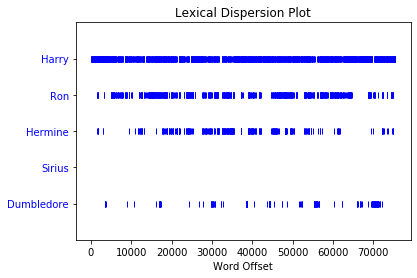

In [10]:
textList.dispersion_plot(["Harry", "Ron", "Hermine", "Sirius", "Dumbledore"])


In [25]:
from nltk.probability import FreqDist
fdist1 = FreqDist(textList) 

In [26]:
fdist1.most_common(50)

[('harry', 14294),
 ('sagte', 10270),
 ('ron', 4927),
 ('hermine', 4256),
 ('dumbledore', 2469),
 ('schon', 1997),
 ('immer', 1884),
 ('sah', 1876),
 ('ja', 1820),
 ('professor', 1750),
 ('mal', 1684),
 ('konnte', 1655),
 ('hagrid', 1460),
 ('snape', 1437),
 ('hätte', 1358),
 ('mehr', 1323),
 ('fragte', 1317),
 ('augen', 1286),
 ('zauberstab', 1243),
 ('stimme', 1236),
 ('gesicht', 1193),
 ('hast', 1156),
 ('weasley', 1137),
 ('malfoy', 1098),
 ('zurück', 1093),
 ('hand', 1091),
 ('gut', 1087),
 ('kopf', 1081),
 ('potter', 1074),
 ('wurde', 1026),
 ('ganz', 1014),
 ('tür', 1014),
 ('s', 1008),
 ('sehen', 993),
 ('harrys', 983),
 ('nein', 935),
 ('sirius', 917),
 ('gerade', 892),
 ('voldemort', 891),
 ('weiß', 875),
 ('sagen', 874),
 ('blick', 873),
 ('ging', 864),
 ('nie', 852),
 ('kam', 836),
 ('vielleicht', 822),
 ('ließ', 791),
 ('stand', 786),
 ('warum', 780),
 ('gesagt', 777)]

In [40]:
from textblob_de import TextBlobDE as TextBlob

In [20]:
tb1=TextBlob(" We are learning cool Library . We are enjoying a lot .")
tb1

TextBlob(" We are learning cool Library . We are enjoying a lot .")

In [26]:
doc1=TextBlob('Tante Petunia Onkel Vernon gehofft Harry immer Knute hielten Zauberei schließlich')
doc1.polarity ## neutral

0.0

In [22]:
doc1.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [49]:
test = ' '.join(wordFiltered)

In [50]:
doc2 = TextBlob(test)

In [52]:
doc2.polarity

0.06400885296381907